## Crop Yield Prediction Model Development

In [1]:
import pandas as pd

In [2]:
X = pd.read_csv('features.csv')

In [3]:
features = pd.DataFrame(X)
features

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,0.000000,0.000254,0.449671,0.580247,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.043478,0.000254,0.449671,0.550558,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.086957,0.000254,0.449671,0.571135,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.130435,0.000254,0.449671,0.570841,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.173913,0.000424,0.449671,0.597590,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32347,0.826087,0.006912,0.190028,0.702234,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32348,0.869565,0.006987,0.190028,0.721340,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32349,0.913043,0.007061,0.190028,0.709877,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32350,0.956522,0.007135,0.190028,0.702234,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
import numpy as np
features = features.to_numpy()

In [5]:
features

array([[0.00000000e+00, 2.54431251e-04, 4.49670743e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.34782609e-02, 2.54431251e-04, 4.49670743e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.69565217e-02, 2.54431251e-04, 4.49670743e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.13043478e-01, 7.06100635e-03, 1.90028222e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [9.56521739e-01, 7.13538637e-03, 1.90028222e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.39014106e-03, 1.90028222e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [6]:
y = pd.read_csv('label.csv')

In [7]:
label = pd.DataFrame(y)
label

,Value
0,1000.0
1,923.1
2,1380.2
3,1332.4
4,2352.3
...,...
32347,3000.0
32348,2778.8
32349,2660.4
32350,2490.2


## Training Data Split

In [8]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.3, random_state=42)

## Compare the regressor models

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

In [10]:
def compare_models(model):
    model_fit = model.fit(feature_train, label_train)
    y_hat = model_fit.predict(feature_test)
    r2 = r2_score(label_test, y_hat)

    return ([model.__class__.__name__, r2])

In [11]:
# Model Development

models = [
    LinearRegression(),  
    RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    DecisionTreeRegressor(max_depth=5, min_samples_split=4, random_state=42)
]

for model in models:
    print(compare_models(model))

['LinearRegression', 0.7082150500064066]


/Volumes/Builds/Personal/crop_yield/env/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


['RandomForestRegressor', 0.8271242956499714]
['DecisionTreeRegressor', 0.5077378150701213]


## Hyperparameter Tuning

In [12]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees
    'max_depth': [10, 20, 30, 40, None],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Min samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider
    'bootstrap': [True, False]  # Whether to use bootstrapping
}

# Create the model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Randomized Search (performs 20 random combinations from param_grid)
random_search = RandomizedSearchCV(
    estimator=rf, param_distributions=param_grid,
    n_iter=20,  # Number of random samples to test
    cv=5,  # 5-fold cross-validation
    verbose=2, n_jobs=-1, random_state=42
)

# Fit the model (Assuming you have data X_train, y_train)
random_search.fit(feature_train, label_train)

# Print best parameters
print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Volumes/Builds/Personal/crop_yield/env/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Volumes/Builds/Personal/crop_yield/env/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Volumes/Builds/Personal/crop_yield/env/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Volumes/Builds/Personal/crop_yield/env/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A co

[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   3.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   5.4s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=  10.4s


/Volumes/Builds/Personal/crop_yield/env/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Volumes/Builds/Personal/crop_yield/env/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Volumes/Builds/Personal/crop_yield/env/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Volumes/Builds/Personal/crop_yield/env/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A co

[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   2.7s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   5.1s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=  10.6s
[CV] END bootstrap=False, max_depth=30, m

/Volumes/Builds/Personal/crop_yield/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/Volumes/Builds/Personal/crop_yield/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Volumes/Builds/Personal/crop_yield/env/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Volumes/Builds/Personal/crop_yield/env/lib/python3.12/site-packages/sklearn/base.py", line 436, in

Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}


In [15]:
## Model Build

randomforest_model = RandomForestRegressor(
    random_state=42,
    n_estimators=400, 
    min_samples_split = 2, 
    min_samples_leaf = 1, 
    max_features = 'log2', 
    max_depth=None, 
    bootstrap=False
)

model_fit = randomforest_model.fit(feature_train, label_train)
y_hat = model_fit.predict(feature_test)
r2 = r2_score(label_test, y_hat)

print(f"R²: {r2:.2f}")

/Volumes/Builds/Personal/crop_yield/env/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R²: 0.97


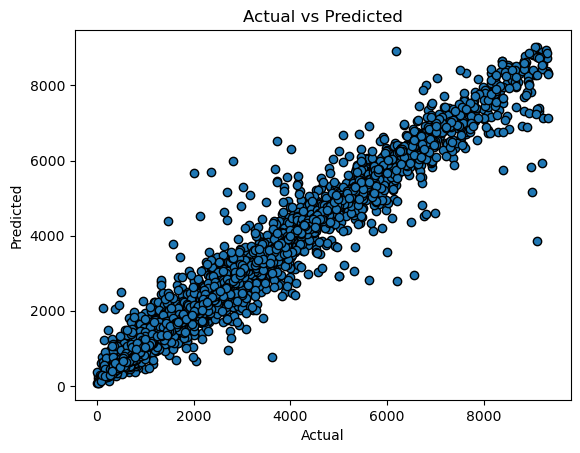

[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   5.7s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   4.9s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END bootstrap=False, max_depth=30, m

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots() 

ax.scatter(label_test, y_hat,edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()